In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import random
from scipy.integrate import odeint

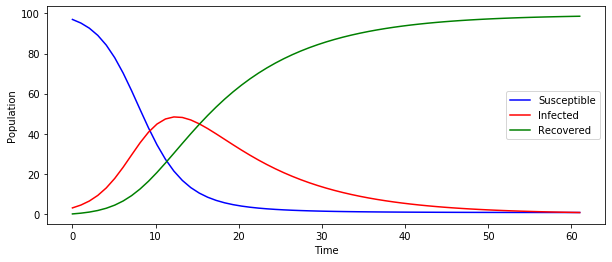

In [2]:
def continu(beta,gamma,mu,S0,I0,tmax):
    R0 = 0
    N = S0 + R0 + I0
    t = np.linspace(0,tmax+1,tmax+1)
    def derive(y,t,beta,gamma,mu):    
        """
        dS/dt = (-beta*S*I)/N
        dI/dt = (beta*S*I)/N - gamma*I
        dR/dt = gamma*I
        """
        S,I,R, = y
        dSdt = ((-beta * S * I) / N) - (mu*S)
        dIdt = ((beta * S * I) / N) - (mu*I) - (gamma*I)
        dRdt = ((gamma) * I) - (mu*R)    
        return dSdt,dIdt,dRdt
    y0 = S0,I0,R0
    ret = odeint(derive,y0,t,args=(beta,gamma,mu))
    S,I,R = ret.T
    temps = range(0,(tmax+1),1) 
    #print("S(tmax)=", S[tmax])
    #print ("I(tmax)=",I[tmax])
    #print("R(tmax)=",R[tmax])
    plt.figure(figsize=(10,4))
    plt.plot(t,S,color='blue',label='Susceptible')
    plt.plot(t,I,color='red',label='Infected')
    plt.plot(t,R,color='green',label='Recovered')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.savefig('SIR.jpg',dpi=500)
    #plt.savefig('SIR.pdf')
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=97,I0=3)

In [ ]:
  #plt.figure(figsize=(8,5))
    #plt.title("Simulation Markov Continue avec N=100 et i0=3")
    #plt.scatter(t,S,s=7,c='b',label='Susceptible')
    #plt.scatter(t,I,s=1,c='gray',label='Infected')
    #plt.scatter(t,R,s=7,c='green',label='Removed')
    #plt.xlabel('Time')
    #plt.ylabel('Number of infected')
    #plt.savefig('SIR_sto.jpg',dpi=500)
    #plt.savefig('SIR_sto.pdf')
    #plt.legend()

# CTMC model

In [2]:
def simulation_continue(N,beta,gamma,mu,temps,i0): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps)) 
    S[0] = N-i0
    I[0] = i0
    R[0] = 0
    t[0] = 0
    m,n,e,f = 0,0,0,0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        U1 = np.random.rand() 
        U2 = np.random.rand() 
        a=(beta*I[i]*S[i]/N)+((gamma)*I[i])
        probi = ((beta/N)*I[i]*S[i])/a
        h = 1/a
        t[i+1] = t[i] + h     
        e += (I[i]*S[i]/N)*h
        f += (I[i]*h)
        if U2 <= probi: 
            S[i+1] = S[i] - 1  
            I[i+1] = I[i] + 1
            R[i+1] = R[i]
            m+=1
        else:                 
            S[i+1] = S[i]  
            I[i+1] = I[i] - 1
            R[i+1] = R[i] + 1
            n+=1
        i += 1
        
    return m/e,n/f
    

In [ ]:
beta = np.zeros((40,1000))
gamma = np.zeros((40,1000))
r0 = np.zeros((40,1000))
line = 0
for i in np.linspace(50,1000,40):
    for j in range(1000):
        beta[line,j] = simulation_continue(N=i,beta=0.50,gamma=0.10,mu=0,temps=2000,i0=3)[0]
        gamma[line,j] = simulation_continue(N=i,beta=0.50,gamma=0.10,mu=0,temps=2000,i0=3)[1]
        r0[line,j] = simulation_continue(N=i,beta=0.50,gamma=0.10,mu=0,temps=2000,i0=3)[0]/simulation_continue(N=i,beta=0.50,gamma=0.10,mu=0,temps=2000,i0=3)[1]
    line = line + 1

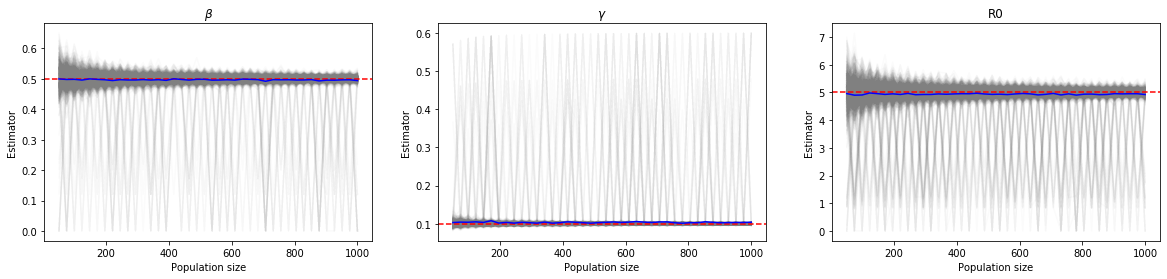

In [28]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,40),beta,color="gray",label='$\\beta$',alpha=0.03)
plt.axhline(y=0.5, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,40),np.mean(beta,axis=1), color='blue')
plt.title("$\\beta$")

plt.subplot(1,3,2)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,40),gamma,color="gray",label='$\gamma$',alpha=0.03)
plt.axhline(y=0.10, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,40),np.mean(gamma,axis=1), color='blue')
plt.title("$\\gamma$")

plt.subplot(1,3,3)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,40),r0,color="gray",label='R0',alpha=0.03)
plt.axhline(y=5, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,40),np.mean(r0,axis=1), color='blue')

plt.title("R0")
#plt.savefig('converg_markov.jpg',dpi=500)

In [13]:
beta,gamma,r0 = list(),list(),list()
for i in range(1000):
    beta.append(simulation_continue(N=100,beta=0.50,gamma=0.10,mu=0,temps=3000,i0=3)[0])
    gamma.append(simulation_continue(N=100,beta=0.50,gamma=0.10,mu=0,temps=3000,i0=3)[1])
    r0.append(simulation_continue(N=100,beta=0.50,gamma=0.10,mu=0,temps=3000,i0=3)[0]/simulation_continue(N=500,beta=0.50,gamma=0.10,mu=0,temps=3000,i0=3)[1])
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(beta,bins=50,label='$\\beta$',color="gray")
plt.axvline(x=0.5, color='red',linestyle='--')
plt.axvline(x=np.mean(beta), color='blue',linestyle='--')
plt.legend()
plt.subplot(1,3,2)
plt.hist(gamma,bins=50,label='$\gamma$',color="gray")
plt.axvline(x=0.10, color='red',linestyle='--')
plt.axvline(x=np.mean(gamma), color='blue',linestyle='--')
plt.legend()
plt.subplot(1,3,3)
plt.hist(r0,bins=50,label='R0',color="gray")
plt.axvline(x=5, color='red',linestyle='--')
plt.axvline(x=np.mean(r0), color='blue',linestyle='--')
plt.legend()
#plt.savefig('large_p.jpg',dpi=500)
#plt.savefig('small_p.pdf')

/home/lingz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


ZeroDivisionError: float division by zero

# DTMC model

In [42]:
def simulation_discret(N=1000,beta=0.5,gamma=0.1,dt=0.01,temps=8000,i0=3): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps)) 
    trans = []
    S[0] = N-i0
    I[0] = i0
    R[0] = 0
    t[0] = 0
    i = 0 
    while  i < (temps-1): 
        t[i+1] = t[i] + dt
        prob = np.zeros(3)
        prob[0] = (beta/N)*I[i]*S[i]*dt
        prob[1] = gamma*I[i]*dt
        prob[2] = 1 - (((beta/N)*I[i]*S[i])+gamma*I[i])*dt
        
        U1 = np.random.rand() 
        transition = 0
        proba = prob[0]
        
        while U1 > proba:
            transition = transition + 1
            proba = proba + prob[transition]
            
        if transition == 0:
            S[i+1] = S[i] - 1  
            I[i+1] = I[i] + 1
            R[i+1] = R[i]
        elif transition == 1:
            S[i+1] = S[i]  
            I[i+1] = I[i] - 1
            R[i+1] = R[i] + 1
        elif transition == 2 :
            S[i+1] = S[i]  
            I[i+1] = I[i] 
            R[i+1] = R[i] 
        
        trans.append(transition)
        i += 1
    #plt.title("Simulation Markov Discret avec N=100 et i0=3")
    #plt.plot(t,S,c='b',label='Susceptible')
    plt.plot(t,I,c='gray')
    #plt.plot(t,R,c='green',label='Remis')
    plt.xlabel('Time')
    plt.ylabel('Population')
    #plt.legend()

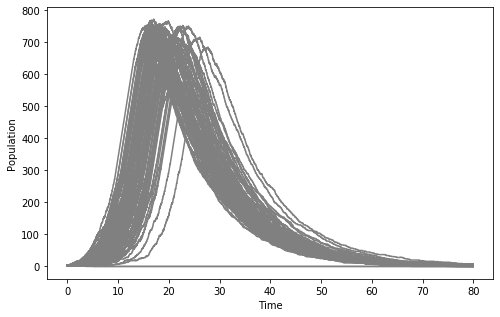

In [43]:
plt.figure(figsize=(8,5))
for i in range(100):
    simulation_discret()

# Simulation EDS

In [4]:
def simulation_EDS(N,beta=0.5, gamma=0.10,dt=0.1,temps=600,i0=3): 
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps))
    S[0] = N - i0
    I[0] = i0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1):  
        S[i+1] = S[i] - (beta*S[i]*I[i]/N)*dt + np.sqrt((beta*S[i]*I[i]/N))*np.random.normal(0,dt) - np.sqrt((beta*S[i]*I[i]/N))*np.random.normal(0,dt)
        I[i+1] = I[i] + (beta*S[i]*I[i]/N - gamma*I[i])*dt - np.sqrt((beta*S[i]*I[i]/N))*np.random.normal(0,dt) + np.sqrt(((beta*S[i]*I[i]/N)+gamma*I[i]))*np.random.normal(0,dt)
        R[i+1] = N - I[i+1] - S[i+1]
        t[i+1] = t[i] + dt          
        i += 1
    #plt.plot(t,S,color='blue',label='Susceptible')
    plt.plot(t,I,color='gray')
    #plt.plot(t,R,color='green',label='Removed')
    plt.xlabel('Time')
    plt.ylabel('Population')
    #plt.legend()

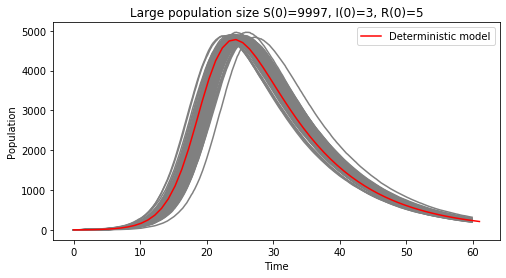

In [12]:

plt.figure(figsize=(8,4))
for i in range(100):
    simulation_EDS(N=10000)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=9997,I0=3)
plt.title('Large population size S(0)=9997, I(0)=3, R(0)=5')
"""plt.subplot(1,3,1)
for i in range(100):
    simulation_EDS(N=100)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=97,I0=3)
plt.title('Smaller population S(0)=97, I(0)=3, R(0)=5')

plt.subplot(1,3,2)
for i in range(100):
    simulation_EDS(N=1000)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=997,I0=3)
plt.title('Large population size S(0)=997, I(0)=3, R(0)=5')

plt.subplot(1,3,3)
for i in range(100):
    simulation_EDS(N=10000)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=9997,I0=3)
plt.title('Large population size S(0)=9997, I(0)=3, R(0)=5')"""
plt.savefig('Sim_SDE3.jpg',dpi=500)
#plt.savefig('Sim_SDE.pdf')

# Simulation modèle poisson

In [ ]:
def simpois(alpha):
    a = np.exp(-alpha)
    k=0
    M=np.random.rand()
    while M>=a:
        M=M*np.random.rand()
        k=k+1
    return k

In [19]:
def SIR_poisson(N=100,beta=0.50,gamma=0.10,i0=3,temps=80):
    b = np.zeros(temps)
    g = np.zeros(temps)
    b[0]=beta
    g[0]=gamma
    g = np.zeros(temps)
    t = np.zeros((temps)) 
    S = np.zeros((temps))
    I = np.zeros((temps)) 
    R = np.zeros((temps))
    S[0] = N - i0
    I[0] = i0
    t[0] = 0
    i = 0 
    while I[i] > 0 and i < (temps-1): 
        S[i+1] = S[i] - beta*simpois(S[i]*I[i]/N)
        I[i+1] = I[i] + beta*simpois(S[i]*I[i]/N) - gamma*simpois(I[i])
        R[i+1] = R[i] + gamma*simpois(I[i])
        b[i+1] = (S[0]-S[i])/(np.cumsum(S*I/N)[i])
        g[i+1] = (R[i])/(np.cumsum(I)[i])
        i += 1
    #plt.plot(t,S,color='blue',label='Susceptible')
    #plt.plot(I,color='gray')
    #plt.plot(t,R,color='green',label='Removed')
    #plt.xlabel('Time')
    #plt.ylabel('Population')
    return sum(b)/temps,sum(g)/temps

In [22]:
b = np.zeros((50,1000))
g = np.zeros((50,1000))
r = np.zeros((50,1000))
line = 0
for i in np.linspace(50,1000,50):
    for j in range(1000):
        b[line,j] = SIR_poisson(N=i,beta=0.50,gamma=0.10,temps=50,i0=3)[0]
        g[line,j] = SIR_poisson(N=i,beta=0.50,gamma=0.10,temps=50,i0=3)[1]
        r[line,j] = SIR_poisson(N=i,beta=0.50,gamma=0.10,temps=50,i0=3)[0]/SIR_poisson(N=i,beta=0.50,gamma=0.10,temps=50,i0=3)[1]
    line = line + 1

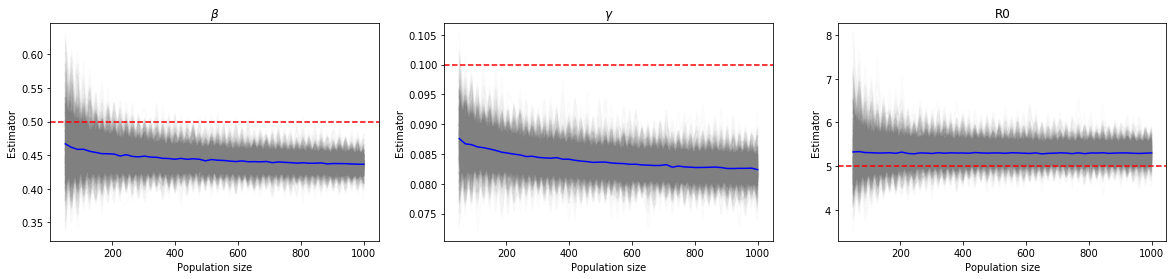

In [29]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,50),b,color="gray",label='$\\beta$',alpha=0.03)
plt.axhline(y=0.5, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,50),np.mean(b,axis=1),color='blue')
plt.title("$\\beta$")

plt.subplot(1,3,2)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,50),g,color="gray",label='$\gamma$',alpha=0.03)
plt.axhline(y=0.10, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,50),np.mean(g,axis=1), color='blue')
plt.title("$\\gamma$")

plt.subplot(1,3,3)
plt.xlabel("Population size")
plt.ylabel("Estimator")
plt.plot(np.linspace(50,1000,50),r,color="gray",label='R0',alpha=0.03)
plt.axhline(y=5, color='red',linestyle='--')
plt.plot(np.linspace(50,1000,50),np.mean(r,axis=1), color='blue')

plt.title("R0")
plt.savefig('converg_poisson.jpg',dpi=500)

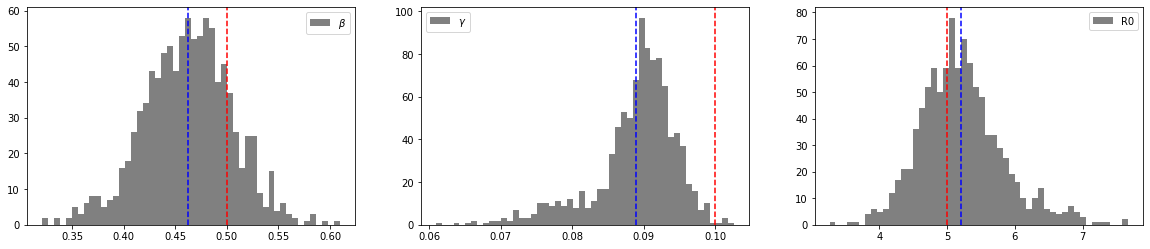

In [134]:
beta,gamma,r0 = list(),list(),list()
for i in range(1000):
    beta.append(SIR_poisson()[0])
    gamma.append(SIR_poisson()[1])
    r0.append(SIR_poisson()[0]/SIR_poisson()[1])
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.hist(beta,bins=50,label='$\\beta$',color="gray")

plt.axvline(x=0.5, color='red',linestyle='--')
plt.axvline(x=np.mean(beta), color='blue',linestyle='--')
plt.legend()
plt.subplot(1,3,2)
plt.hist(gamma,bins=50,label='$\gamma$',color="gray")

plt.axvline(x=0.10, color='red',linestyle='--')
plt.axvline(x=np.mean(gamma), color='blue',linestyle='--')
plt.legend()
plt.subplot(1,3,3)
plt.hist(r0,bins=50,label='R0',color="gray")
plt.axvline(x=5, color='red',linestyle='--')
plt.axvline(x=np.mean(r0), color='blue',linestyle='--')
plt.legend()
#plt.savefig('small_poisson.jpg',dpi=500)
#plt.savefig('small_p.pdf')

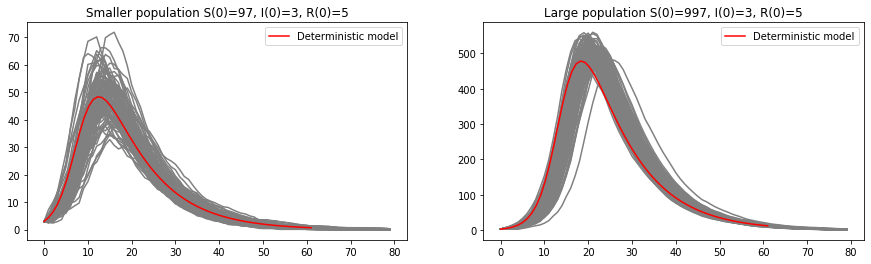

In [8]:
np.random.seed(1)
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
for i in range(100):
    SIR_poisson(N=100,beta=0.50,gamma=0.10,i0=3,temps=80)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=97,I0=3)
plt.title('Smaller population S(0)=97, I(0)=3, R(0)=5')
plt.subplot(1,2,2)
for i in range(100):
    SIR_poisson(N=1000,beta=0.50,gamma=0.10,i0=3,temps=80)
continu(beta=0.50,gamma=0.10,mu=0,tmax=60,S0=997,I0=3)
plt.title('Large population S(0)=997, I(0)=3, R(0)=5')
plt.savefig('Sim_POI.jpg',dpi=500)

In [257]:
simpois(6)

9